In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

import os
os.getcwd()
os.chdir('C:\\Users\\Dubey\\Downloads')

# Perform statistical tests before PCA 
from factor_analyzer import FactorAnalyzer 
import warnings
warnings.filterwarnings("ignore")

# k meance clustering
from sklearn.cluster import KMeans 
%time

CPU times: total: 0 ns
Wall time: 0 ns


*Part 1.1- Clustering: Read the data and perform basic analysis such as printing a few rows (head and tail), info, data summary, null values duplicate values, etc.*

In [2]:
#Read the data
df = pd.read_excel('Clustering Clean Ads_Data.xlsx') 

In [3]:
df.shape #shape of data

(25857, 19)

In [4]:
from IPython.core.display import display, HTML # this two lines of code is just to increase the size of the display
display(HTML('<style>.container { width:90% !important; }<\style>'))
 
df.head() # few top rows of data

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,2020-9-2-18,Format1,300,250,75000,Inter223,Web,Mobile,Display,1979,384,380,0,0.0,0.35,0.0,0.0000,0.0,NaN
2,2020-9-3-16,Format6,336,250,84000,Inter217,Web,Desktop,Video,1566,298,297,0,0.0,0.35,0.0,0.0000,0.0,NaN
3,2020-9-3-2,Format1,300,250,75000,Inter224,Web,Desktop,Display,643,103,102,0,0.0,0.35,0.0,0.0000,0.0,NaN
4,2020-9-3-13,Format1,300,250,75000,Inter225,Video,Mobile,Display,1550,347,345,0,0.0,0.35,0.0,0.0000,0.0,NaN


In [5]:
df.tail() # few last rows of data

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
25852,2020-10-1-5,Format5,720,300,216000,Inter222,Video,Desktop,Video,1,1,1,0,0.01,0.35,0.0065,NaN,NaN,NaN
25853,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
25854,2020-9-14-0,Format5,720,300,216000,Inter221,App,Mobile,Video,2,2,2,1,0.09,0.35,0.0585,NaN,NaN,NaN
25855,2020-9-30-4,Format7,300,600,180000,Inter228,Video,Mobile,Display,1,1,1,0,0.01,0.35,0.0065,NaN,NaN,NaN
25856,2020-10-17-3,Format5,720,300,216000,Inter225,Video,Mobile,Display,1,1,1,0,0.01,0.35,0.0065,NaN,NaN,NaN


In [6]:
df.info() # info of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25857 entries, 0 to 25856
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              25857 non-null  object 
 1   InventoryType          25857 non-null  object 
 2   Ad - Length            25857 non-null  int64  
 3   Ad- Width              25857 non-null  int64  
 4   Ad Size                25857 non-null  int64  
 5   Ad Type                25857 non-null  object 
 6   Platform               25857 non-null  object 
 7   Device Type            25857 non-null  object 
 8   Format                 25857 non-null  object 
 9   Available_Impressions  25857 non-null  int64  
 10  Matched_Queries        25857 non-null  int64  
 11  Impressions            25857 non-null  int64  
 12  Clicks                 25857 non-null  int64  
 13  Spend                  25857 non-null  float64
 14  Fee                    25857 non-null  float64
 15  Re

In [7]:
df.duplicated().sum() # check duplicate

0

In [8]:
df.isnull().sum() # check nulls

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      6465
CPM                      6465
CPC                      7527
dtype: int64

In [14]:
df_obj=df.select_dtypes(include='object') # objective type variables
df_obj=df_obj.drop(['Timestamp'], axis=1)
df_obj.head()

,InventoryType,Ad Type,Platform,Device Type,Format
0,Format1,Inter222,Video,Desktop,Display
1,Format1,Inter223,Web,Mobile,Display
2,Format6,Inter217,Web,Desktop,Video
3,Format1,Inter224,Web,Desktop,Display
4,Format1,Inter225,Video,Mobile,Display


In [15]:
# value counts of objective type variables
print('Inventory type\n',  df_obj['InventoryType'].value_counts())
print('\nAD type\n',df_obj['Ad Type'].value_counts())
print('\nPlatform\n',df_obj['Platform'].value_counts())
print('\nDevice Type\n',df_obj['Device Type'].value_counts())
print('\nFormat\n',df_obj['Format'].value_counts())
# i have not done the value count on date 

Inventory type
 Format4    7218
Format1    5432
Format5    5151
Format3    3542
Format6    1968
Format2    1789
Format7     757
Name: InventoryType, dtype: int64

AD type
 Inter217    1849
Inter227    1848
Inter218    1848
Inter219    1848
Inter220    1848
Inter221    1848
Inter222    1847
Inter223    1847
Inter224    1847
inter230    1847
Inter225    1845
Inter226    1845
Inter228    1845
Inter229    1845
Name: Ad Type, dtype: int64

Platform
 Video    11077
Web       9236
App       5544
Name: Platform, dtype: int64

Device Type
 Mobile     16621
Desktop     9236
Name: Device Type, dtype: int64

Format
 Display    12929
Video      12928
Name: Format, dtype: int64


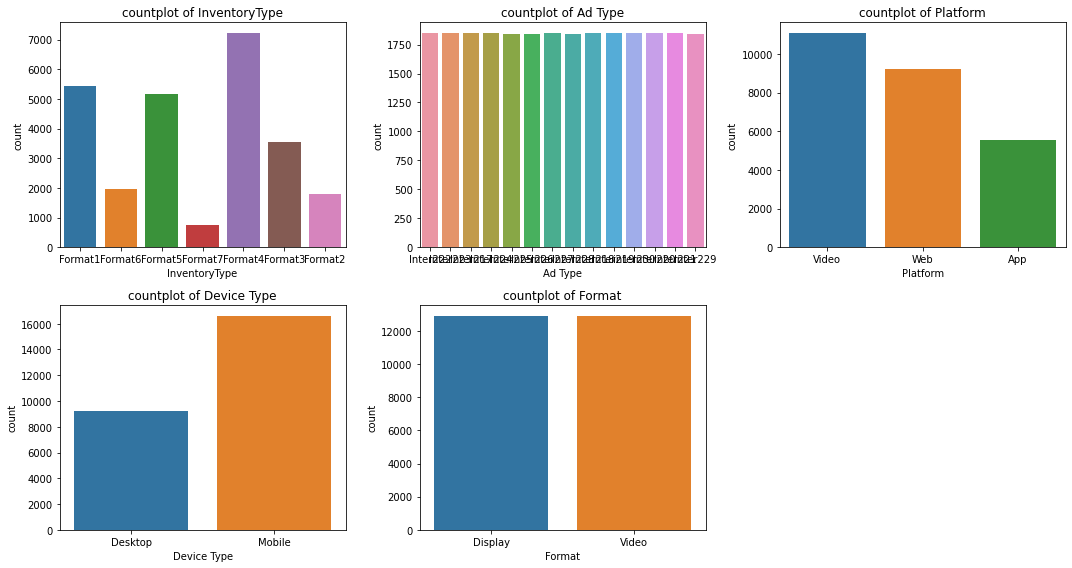

In [16]:
# count plot of obj type variables
plt.figure(figsize = (15,8))
feature_list = df_obj.columns
for i in range(len(feature_list)):
    plt.subplot(2, 3, i + 1)
    sns.countplot(data = df_obj,x= df_obj[feature_list[i]])
    plt.title('countplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [31]:
df.describe() # statistical summary of data

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
count,25857.000000,25857.000000,25857.000000,2.585700e+04,2.585700e+04,2.585700e+04,25857.000000,25857.000000,25857.000000,25857.000000,25638.000000,25638.000000,2.327100e+04
mean,390.431218,332.182774,99683.276482,2.169621e+06,1.155322e+06,1.107525e+06,9525.881386,2414.473115,0.336729,1716.548955,0.075663,7.588959,inf
std,230.696051,194.260924,62640.685612,4.542680e+06,2.407244e+06,2.326648e+06,16721.686071,3932.835240,0.030540,2993.025498,0.091413,8.938999,NaN
min,120.000000,70.000000,33600.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.210000,0.000000,0.000000,0.000000,0.000000e+00
25%,120.000000,250.000000,72000.000000,9.133000e+03,5.451000e+03,2.558000e+03,305.000000,36.030000,0.350000,23.420000,0.002400,1.589608,8.996397e-02
50%,300.000000,300.000000,75000.000000,3.309680e+05,1.894490e+05,1.621620e+05,3457.000000,1173.660000,0.350000,762.880000,0.007700,3.333333,1.408485e-01
75%,720.000000,600.000000,84000.000000,2.208484e+06,1.008171e+06,9.496930e+05,10681.000000,2692.280000,0.350000,1749.982000,0.130900,12.491089,5.584425e-01
max,728.000000,600.000000,216000.000000,2.759286e+07,1.470202e+07,1.419477e+07,143049.000000,26931.870000,0.350000,21276.180000,2.000000,715.000000,inf


*Part 1 .2 - Clustering: Treat missing values in CPC, CTR and CPM using the formula given.*

In [32]:
# function to solve missing value problem

def calculate_CTR(x):
    Total_Mea_Click=df.Clicks
    Total_Mea_Ad_Impressions=df.Impressions
    CTR=round((Total_Mea_Click/Total_Mea_Ad_Impressions),4)
    return CTR
# CTR = Total Measured Clicks / Total Measured Ad Impressions x 100\
# as the data is already is in % so we will not do multiplication by 100  

def calculate_CPC(x):
    Total_cost=df.Spend
    Clicks=df.Clicks
    CPC=Total_cost/Clicks
    return CPC
# CPC = total cost / clicks

def calculate_CPM(x):
    Total_capaingn_spend=df.Spend
    Number_of_Impression=df.Impressions
    CPM=(Total_capaingn_spend/Number_of_Impression)*1000
    return CPM
# CPM = (total capaingn spend / number of impressions)*1000

In [33]:
df['CTR']=df[['CTR']].apply(lambda x: calculate_CTR(x))
Null_values_CTR=df[df['CTR'].isnull()]
df['CPC']=df[['CPC']].apply(lambda x: calculate_CPC(x))
Null_values_CPC=df[df['CPC'].isnull()]
df['CPM']=df[['CPM']].apply(lambda x: calculate_CPM(x))
Null_values_CPM=df[df['CPM'].isnull()]

In [34]:
df.isnull().sum() # checking null values

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                       219
CPM                       219
CPC                      2586
dtype: int64

In [35]:
df1 = df.drop(Null_values_CPM.index[:,]) # drop nulls

In [36]:
df1.isnull().sum() # check nulls

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                         0
CPM                         0
CPC                      2367
dtype: int64

In [37]:
# fill 0 in empty cells
df1['CPC'].fillna(value=0,inplace=True)
#replace inf and -inf with zero
df1.replace([np.inf, -np.inf], 0, inplace=True)

In [38]:
df1.isnull().sum() # check nulls

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64

In [39]:
df1.describe() # lets see statistical summary of clean data 

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
count,25638.000000,25638.000000,25638.000000,2.563800e+04,2.563800e+04,2.563800e+04,25638.000000,25638.000000,25638.000000,25638.000000,25638.000000,25638.000000,25638.000000
mean,388.127155,332.155394,98773.479991,2.188154e+06,1.165191e+06,1.116986e+06,9607.251541,2435.097563,0.336616,1731.211730,0.075663,7.588959,0.302902
std,229.832116,194.881782,62055.513861,4.557595e+06,2.415124e+06,2.334302e+06,16769.662367,3943.234023,0.030645,3001.556311,0.091413,8.938999,0.339119
min,120.000000,70.000000,33600.000000,1.000000e+00,1.000000e+00,1.000000e+00,0.000000,0.000000,0.210000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,250.000000,72000.000000,1.053350e+04,6.328500e+03,2.873250e+03,340.000000,40.012500,0.350000,26.007500,0.002400,1.589608,0.078988
50%,300.000000,300.000000,75000.000000,3.469430e+05,1.953880e+05,1.664925e+05,3536.000000,1194.930000,0.350000,776.710000,0.007700,3.333333,0.119688
75%,720.000000,600.000000,84000.000000,2.232121e+06,1.018126e+06,9.616298e+05,10856.250000,2718.142500,0.350000,1766.792875,0.130900,12.491089,0.503213
max,728.000000,600.000000,216000.000000,2.759286e+07,1.470202e+07,1.419477e+07,143049.000000,26931.870000,0.350000,21276.180000,2.000000,715.000000,7.264000


In [40]:
df1.head() # few rows of cleaned data

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,2020-9-2-18,Format1,300,250,75000,Inter223,Web,Mobile,Display,1979,384,380,0,0.0,0.35,0.0,0.0000,0.0,0.0
2,2020-9-3-16,Format6,336,250,84000,Inter217,Web,Desktop,Video,1566,298,297,0,0.0,0.35,0.0,0.0000,0.0,0.0
3,2020-9-3-2,Format1,300,250,75000,Inter224,Web,Desktop,Display,643,103,102,0,0.0,0.35,0.0,0.0000,0.0,0.0
4,2020-9-3-13,Format1,300,250,75000,Inter225,Video,Mobile,Display,1550,347,345,0,0.0,0.35,0.0,0.0000,0.0,0.0


*Part 1.3 - Clustering: Check if there are any outliers. Do you think treating outliers is necessary for K-Means clustering? Based on your judgement decide whether to treat outliers and if yes, which method to employ. (As an analyst your judgement may be different from another analyst).*

In [41]:
df1.dtypes

Timestamp                 object
InventoryType             object
Ad - Length                int64
Ad- Width                  int64
Ad Size                    int64
Ad Type                   object
Platform                  object
Device Type               object
Format                    object
Available_Impressions      int64
Matched_Queries            int64
Impressions                int64
Clicks                     int64
Spend                    float64
Fee                      float64
Revenue                  float64
CTR                      float64
CPM                      float64
CPC                      float64
dtype: object

In [42]:
df3 = df1.drop(['Timestamp', 'InventoryType','Ad Type', 'Platform', 'Device Type', 'Format','Fee'], axis=1)

In [43]:
df3.dtypes

Ad - Length                int64
Ad- Width                  int64
Ad Size                    int64
Available_Impressions      int64
Matched_Queries            int64
Impressions                int64
Clicks                     int64
Spend                    float64
Revenue                  float64
CTR                      float64
CPM                      float64
CPC                      float64
dtype: object

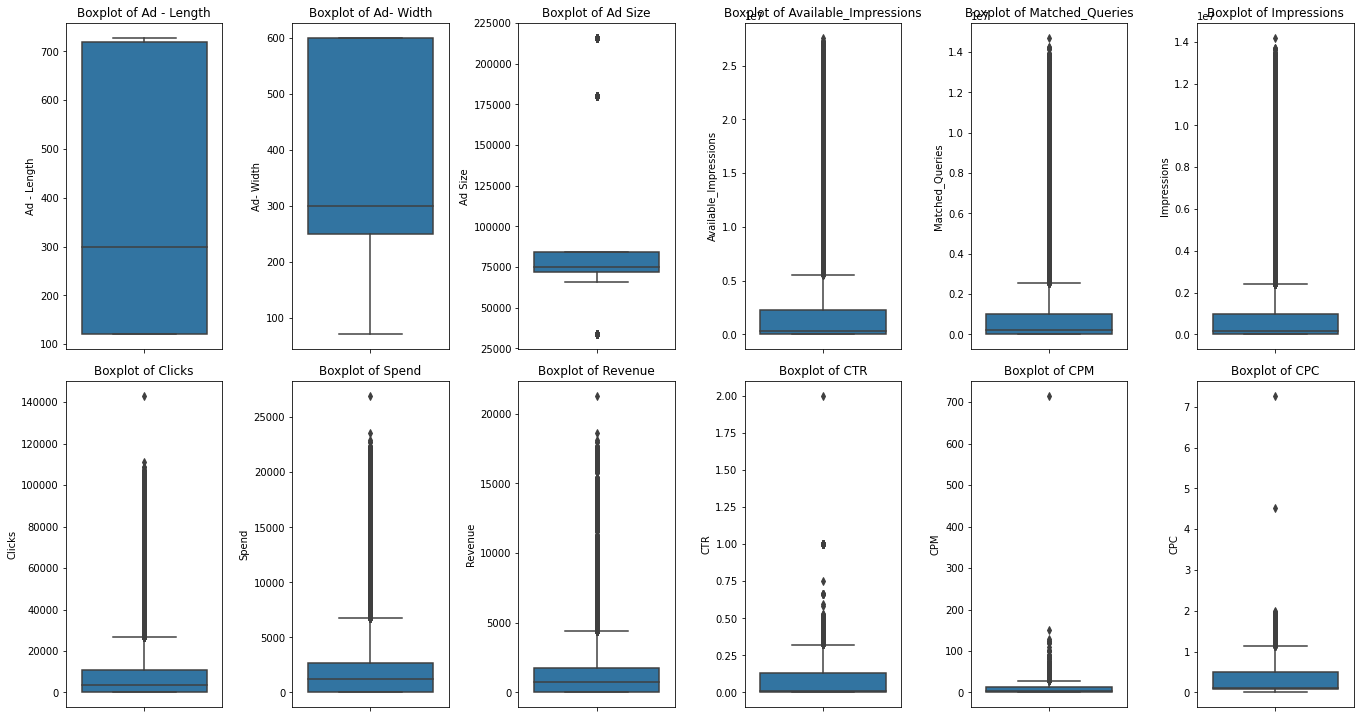

In [44]:
# boxplot
plt.figure(figsize = (19,15))
feature_list = df3.columns
for i in range(len(feature_list)):
    plt.subplot(3, 6, i + 1)
    sns.boxplot(y = df3[feature_list[i]], data = df3)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [45]:
#Define a function which returns the Upper and Lower limit to detect outliers for each feature
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range  

In [46]:
#Cap & floor the values beyond the outlier boundaries
for i in feature_list:
    LL, UL = remove_outlier(df3[i])
    df3[i] = np.where(df3[i] > UL, UL, df3[i])
    df3[i] = np.where(df3[i] < LL, LL, df3[i])

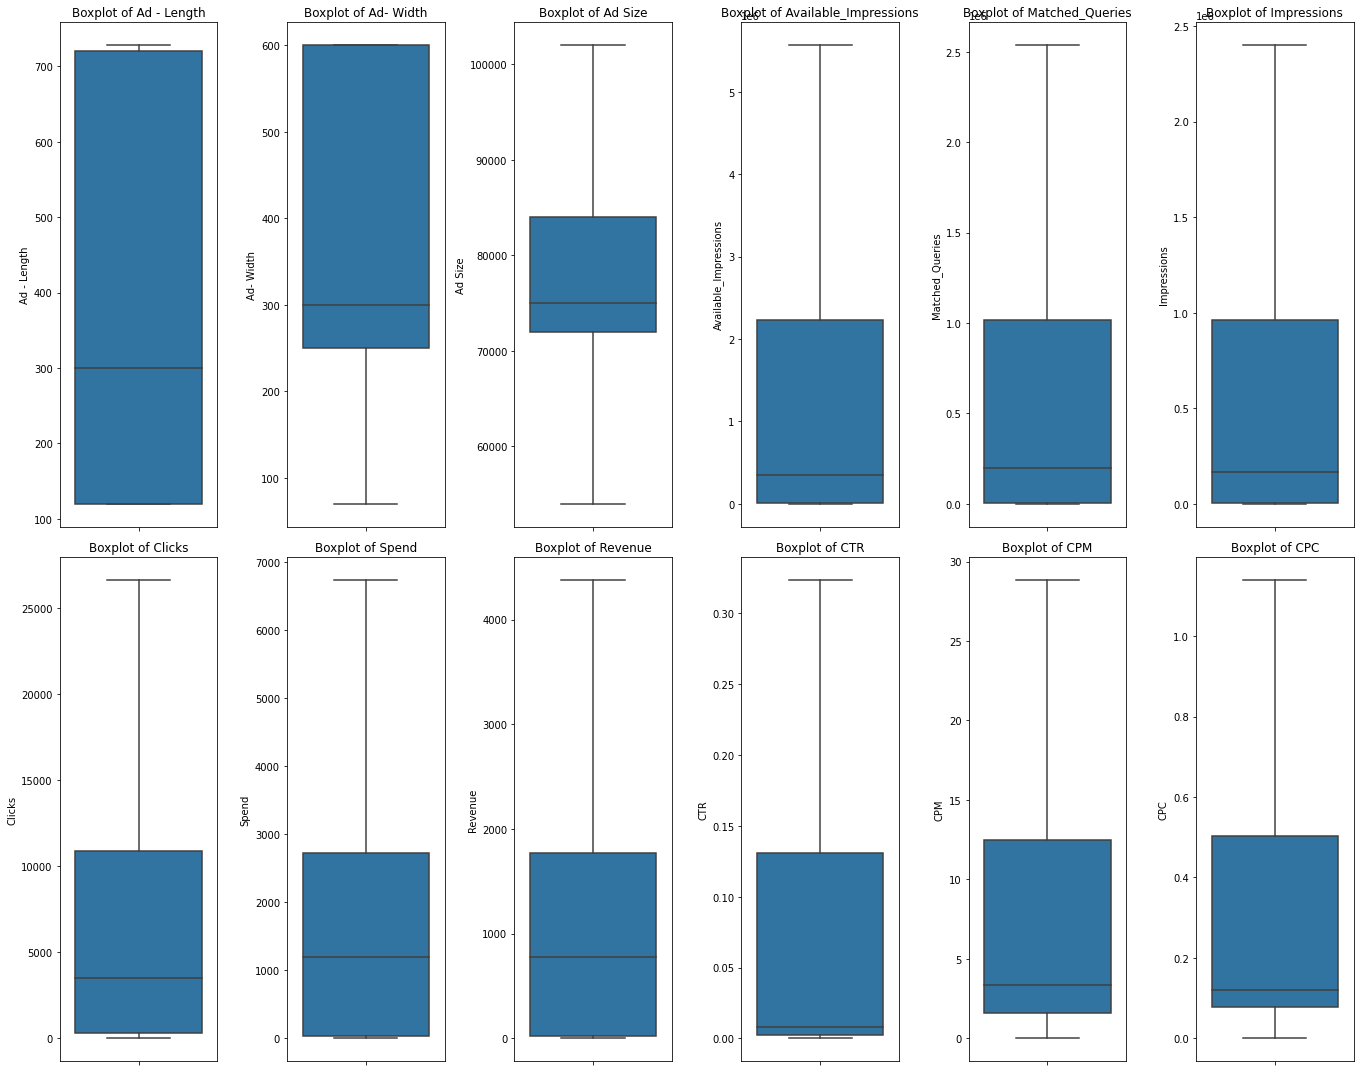

In [47]:
# boxplot
plt.figure(figsize = (19,15))
feature_list = df3.columns
for i in range(len(feature_list)):
    plt.subplot(2, 6, i + 1)
    sns.boxplot(y = df3[feature_list[i]], data = df3)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

*Part 1.4 - Clustering: Perform z-score scaling and discuss how it affects the speed of the algorithm.*

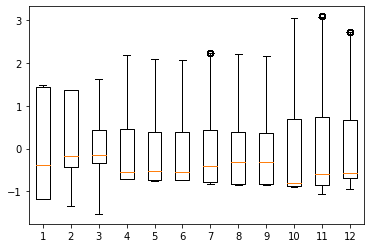

In [50]:
# i have done z-score scaling with sklearn but we can also do it with scipy
# Scale the data
from sklearn.preprocessing import StandardScaler
X = StandardScaler()
df4 = X.fit_transform(df3)
# boxplot of scaled data
plt.boxplot(df4);

*Part 1.5 - Clustering: Perform Hierarchical by constructing a Dendrogram using WARD and Euclidean distance.*

In [51]:
from scipy.cluster.hierarchy import dendrogram, linkage # package for dendrogram

In [ ]:
wardlink = linkage(df4, method = 'ward') 

In [ ]:
dend = dendrogram(wardlink) # dendrogram

In [ ]:
# dendroram with p = 10
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [52]:
from sklearn.cluster import AgglomerativeClustering # package for euclidean

In [ ]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
Cluster_agglo=cluster.fit_predict(df4)
print(Cluster_agglo)

*Part 1.6 - Clustering: Make Elbow plot (up to n=10) and identify optimum number of clusters for k-means algorithm.*

In [53]:
df4 # scaled data

array([[-0.38344891, -0.42157351, -0.14990305, ..., -0.86556325,
        -1.07079167, -0.95147755],
       [-0.38344891, -0.42157351, -0.14990305, ..., -0.9034724 ,
        -1.07079167, -0.95147755],
       [-0.22680978, -0.42157351,  0.43997647, ..., -0.9034724 ,
        -1.07079167, -0.95147755],
       ...,
       [ 1.44400758, -0.16500271,  1.6197355 , ...,  3.05436479,
         3.09192916, -0.66080968],
       [-0.38344891,  1.3744221 ,  1.6197355 , ..., -0.9034724 ,
         0.37242707, -0.95147755],
       [ 1.44400758, -0.16500271,  1.6197355 , ..., -0.9034724 ,
         0.37242707, -0.95147755]])

In [55]:
# wss
wss=[]
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(df4)
    wss.append(KM.inertia_)

In [56]:
wss

[307656.00000000023,
 187040.42257709554,
 139810.44339868537,
 103416.85198271986,
 74640.95805721855,
 59415.77403742618,
 51488.1212115704,
 44912.961574906265,
 39563.751761419175,
 36010.61026618596]

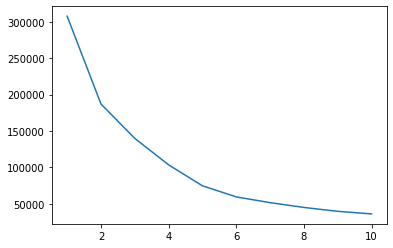

In [57]:
plt.plot(range(1,11), wss) # scree plot

In [59]:
k_means = KMeans(n_clusters = 4)
k_means.fit(df4)
labels = k_means.labels_

In [61]:
df3['kmeans']= labels
df3.head()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Revenue,CTR,CPM,CPC,kmeans
0,300.0,250.0,75000.0,1806.0,325.0,323.0,1.0,0.0,0.0,0.0031,0.0,0.0,2
1,300.0,250.0,75000.0,1979.0,384.0,380.0,0.0,0.0,0.0,0.0000,0.0,0.0,2
2,336.0,250.0,84000.0,1566.0,298.0,297.0,0.0,0.0,0.0,0.0000,0.0,0.0,2
3,300.0,250.0,75000.0,643.0,103.0,102.0,0.0,0.0,0.0,0.0000,0.0,0.0,2
4,300.0,250.0,75000.0,1550.0,347.0,345.0,0.0,0.0,0.0,0.0000,0.0,0.0,2


*Part 1.7 - Clustering: Print silhouette scores for up to 10 clusters and identify optimum number of clusters.*

In [43]:
from sklearn.metrics import silhouette_samples, silhouette_score # silhouette score 

In [44]:
# silhouette scores for up to 10 clusters
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]

for n_clusters in range_n_clusters:
    k_means = KMeans(n_clusters)
    k_means.fit(df5)
    labels = k_means.labels_

    silhouette_avg = silhouette_score(df4,labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

For n_clusters = 2 The average silhouette_score is : 0.3790731628519866
For n_clusters = 3 The average silhouette_score is : 0.3497350804755862
For n_clusters = 4 The average silhouette_score is : 0.4258753276320477
For n_clusters = 5 The average silhouette_score is : 0.4839513671813748
For n_clusters = 6 The average silhouette_score is : 0.4879521917720897
For n_clusters = 7 The average silhouette_score is : 0.4908768188248661
For n_clusters = 8 The average silhouette_score is : 0.5127144457099674
For n_clusters = 9 The average silhouette_score is : 0.5064391516899717
For n_clusters = 10 The average silhouette_score is : 0.47033918891999843


In [45]:
sil_width = silhouette_samples(df4,labels)

In [51]:
df3['sil_width'] = sil_width
df3.head(2)

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Revenue,CTR,CPM,CPC,kmeans,sil_width
0,300.0,250.0,75000.0,1806.0,325.0,323.0,1.0,0.0,0.0,0.0031,0.0,0.0,0,0.889424
1,300.0,250.0,75000.0,1979.0,384.0,380.0,0.0,0.0,0.0,0.0000,0.0,0.0,0,0.897774


In [48]:
silhouette_samples(df4,labels).min()

-0.25665240415896146

*Part 1.8 - Clustering: Profile the ads based on optimum number of clusters using silhouette score and your domain understanding [Hint: Group the data by clusters and take sum or mean to identify trends in Clicks, spend, revenue, CPM, CTR, & CPC based on Device Type. Make bar plots].*

*Part 1.9 - Clustering: Conclude the project by providing summary of your learnings.*

In [ ]:
# done in the business report

# Part 2

*Part 2.1 - PCA: Read the data and perform basic checks like checking head, info, summary, nulls, and duplicates, etc.*

In [5]:
#Read the data
data = pd.read_excel('PCA India Data_Census.xlsx') 

In [6]:
data.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


In [4]:
data.tail()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
635,34,636,Puducherry,Mahe,3333,8154,11781,1146,1203,21,...,32,47,0,0,0,0,0,0,32,47
636,34,637,Puducherry,Karaikal,10612,12346,21691,1544,1533,2234,...,155,337,3,14,38,130,4,23,110,170
637,35,638,Andaman & Nicobar Island,Nicobars,1275,1549,2630,227,225,0,...,104,134,9,4,2,6,17,47,76,77
638,35,639,Andaman & Nicobar Island,North & Middle Andaman,3762,5200,8012,723,664,0,...,136,172,24,44,11,21,1,4,100,103
639,35,640,Andaman & Nicobar Island,South Andaman,7975,11977,18049,1470,1358,0,...,173,122,6,2,17,17,2,4,148,99


In [5]:
data.shape

(640, 61)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
State Code,640.0,17.114062,9.426486,1.0,9.00,18.0,24.00,35.0
Dist.Code,640.0,320.500000,184.896367,1.0,160.75,320.5,480.25,640.0
No_HH,640.0,51222.871875,48135.405475,350.0,19484.00,35837.0,68892.00,310450.0
TOT_M,640.0,79940.576563,73384.511114,391.0,30228.00,58339.0,107918.50,485417.0
TOT_F,640.0,122372.084375,113600.717282,698.0,46517.75,87724.5,164251.75,750392.0
M_06,640.0,12309.098438,11500.906881,56.0,4733.75,9159.0,16520.25,96223.0
F_06,640.0,11942.300000,11326.294567,56.0,4672.25,8663.0,15902.25,95129.0
M_SC,640.0,13820.946875,14426.373130,0.0,3466.25,9591.5,19429.75,103307.0
F_SC,640.0,20778.392188,21727.887713,0.0,5603.25,13709.0,29180.00,156429.0
M_ST,640.0,6191.807813,9912.668948,0.0,293.75,2333.5,7658.00,96785.0


In [8]:
data.duplicated().sum()

0

In [23]:
data.isnull().sum().sort_values(ascending=False)

State Code    0
MARG_CL_M     0
MARG_AL_M     0
MARG_AL_F     0
MARG_HH_M     0
             ..
MAIN_HH_M     0
MAIN_HH_F     0
MAIN_OT_M     0
MAIN_OT_F     0
NON_WORK_F    0
Length: 61, dtype: int64

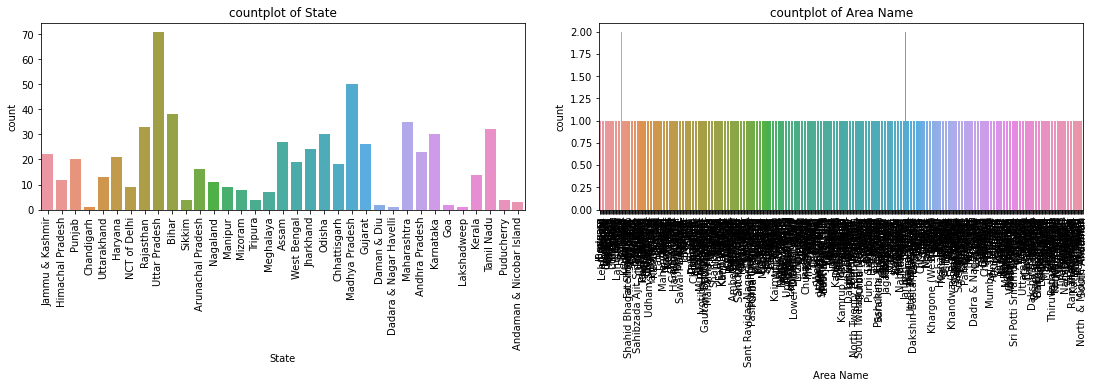

In [24]:
# data with objective type only
data_obj=data.select_dtypes(include='object') 
# count plot of obj type variables
plt.figure(figsize = (23,8))
feature_list = data_obj.columns
for i in range(len(feature_list)):
    plt.subplot(2, 3, i + 1)
    sns.countplot(data = data_obj,x= data_obj[feature_list[i]])
    plt.title('countplot of {}'.format(feature_list[i]))
    plt.tight_layout()
    plt.xticks(rotation=90)

*Part 2.2 - PCA: Perform detailed Exploratory analysis by creating certain questions like (i) Which state has highest gender ratio and which has the lowest? (ii) Which district has the highest & lowest gender ratio? (Example Questions). Pick 5 variables out of the given 24 variables below for EDA: No_HH, TOT_M, TOT_F, M_06, F_06, M_SC, F_SC, M_ST, F_ST, M_LIT, F_LIT, M_ILL, F_ILL, TOT_WORK_M, TOT_WORK_F, MAINWORK_M, MAINWORK_F, MAIN_CL_M, MAIN_CL_F, MAIN_AL_M, MAIN_AL_F, MAIN_HH_M, MAIN_HH_F, MAIN_OT_M, MAIN_OT_F*

In [6]:
data_eda=data[['F_ILL','M_ILL','F_LIT','M_LIT','TOT_WORK_F']]
data_eda.describe().T

,count,mean,std,min,25%,50%,75%,max
F_ILL,640.0,56012.518750,47116.693769,327.0,22367.00,42386.0,78471.00,254160.0
M_ILL,640.0,21972.596875,19825.605268,105.0,8590.00,15767.5,29512.50,105961.0
F_LIT,640.0,66359.565625,75037.860207,371.0,20932.00,43796.5,84799.75,571140.0
M_LIT,640.0,57967.979688,55910.282466,286.0,21298.00,42693.5,77989.50,403261.0
TOT_WORK_F,640.0,41295.760938,37192.360943,357.0,16097.75,30588.5,53234.25,257848.0


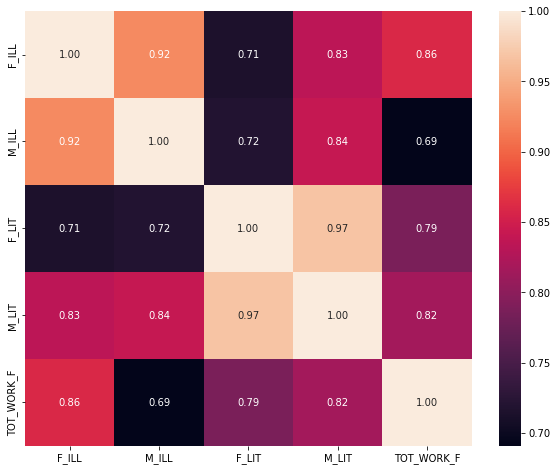

In [11]:
plt.figure(figsize = (10,8))
sns.heatmap(data_eda.corr(), annot=True,fmt='.2f');

Description of F_ILL
----------------------------------------------------------------------------
count       640.000000
mean      56012.518750
std       47116.693769
min         327.000000
25%       22367.000000
50%       42386.000000
75%       78471.000000
max      254160.000000
Name: F_ILL, dtype: float64 Distribution of F_ILL
----------------------------------------------------------------------------


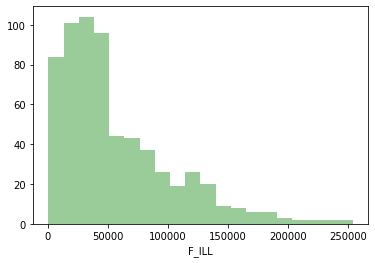

BoxPlot of F_ILL
----------------------------------------------------------------------------


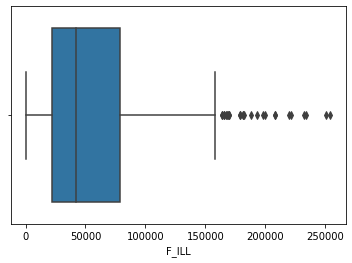

None


In [12]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(data_eda[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(data_eda[column], kde=False, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=data_eda[column])
    plt.show()
    
print(univariateAnalysis_numeric('F_ILL',20))


Description of M_ILL
----------------------------------------------------------------------------
count       640.000000
mean      21972.596875
std       19825.605268
min         105.000000
25%        8590.000000
50%       15767.500000
75%       29512.500000
max      105961.000000
Name: M_ILL, dtype: float64 Distribution of M_ILL
----------------------------------------------------------------------------


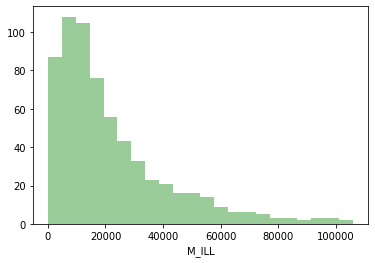

BoxPlot of M_ILL
----------------------------------------------------------------------------


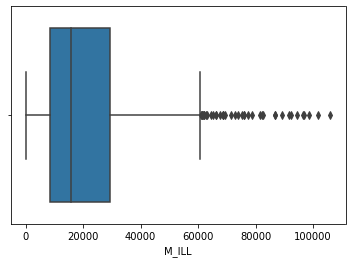

None


In [13]:
print(univariateAnalysis_numeric('M_ILL',20))

Description of M_LIT
----------------------------------------------------------------------------
count       640.000000
mean      57967.979688
std       55910.282466
min         286.000000
25%       21298.000000
50%       42693.500000
75%       77989.500000
max      403261.000000
Name: M_LIT, dtype: float64 Distribution of M_LIT
----------------------------------------------------------------------------


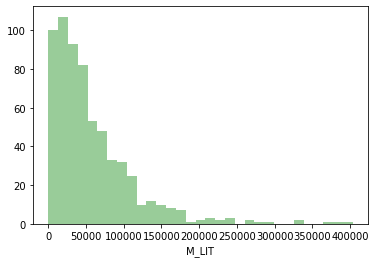

BoxPlot of M_LIT
----------------------------------------------------------------------------


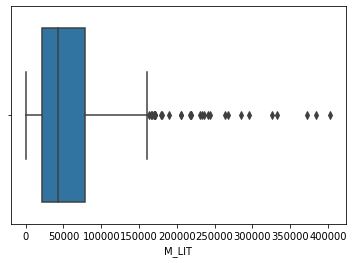

None


In [14]:
print(univariateAnalysis_numeric('M_LIT',20))

Description of M_LIT
----------------------------------------------------------------------------
count       640.000000
mean      57967.979688
std       55910.282466
min         286.000000
25%       21298.000000
50%       42693.500000
75%       77989.500000
max      403261.000000
Name: M_LIT, dtype: float64 Distribution of M_LIT
----------------------------------------------------------------------------


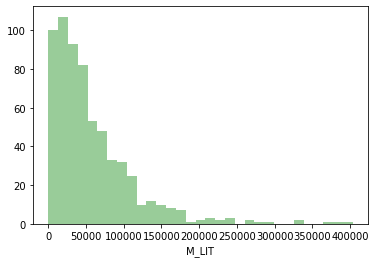

BoxPlot of M_LIT
----------------------------------------------------------------------------


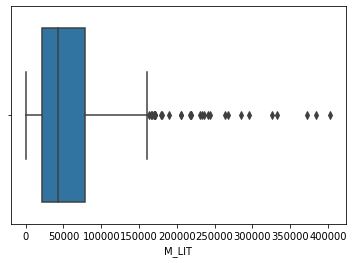

None


In [15]:
print(univariateAnalysis_numeric('M_LIT',20))

Description of TOT_WORK_F
----------------------------------------------------------------------------
count       640.000000
mean      41295.760938
std       37192.360943
min         357.000000
25%       16097.750000
50%       30588.500000
75%       53234.250000
max      257848.000000
Name: TOT_WORK_F, dtype: float64 Distribution of TOT_WORK_F
----------------------------------------------------------------------------


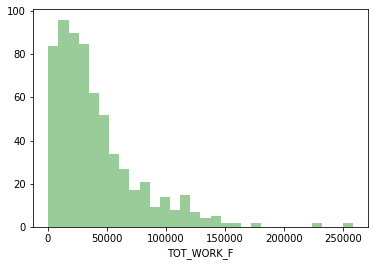

BoxPlot of TOT_WORK_F
----------------------------------------------------------------------------


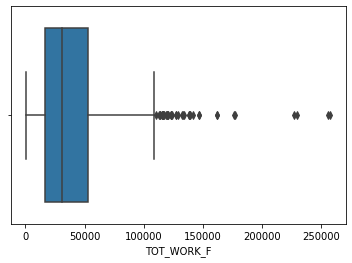

None


In [16]:
print(univariateAnalysis_numeric('TOT_WORK_F',20))

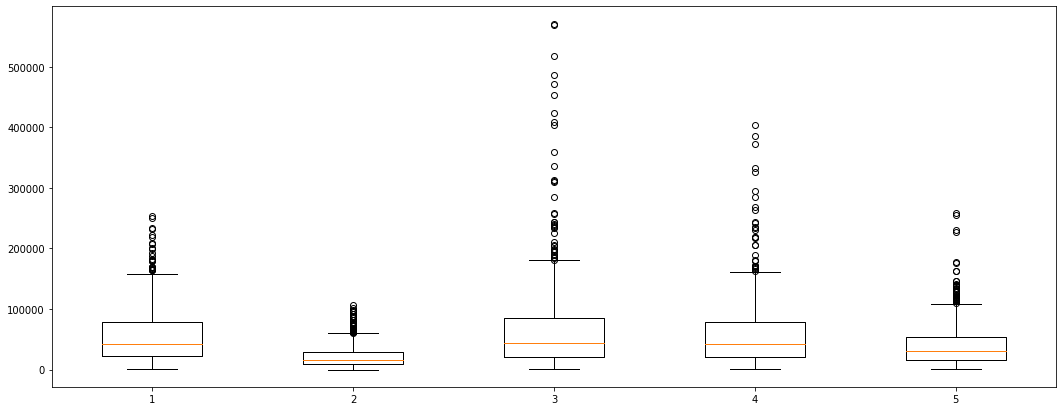

In [17]:
# boxplot
plt.figure(figsize = (18,7))
plt.boxplot(data_eda)
plt.show()

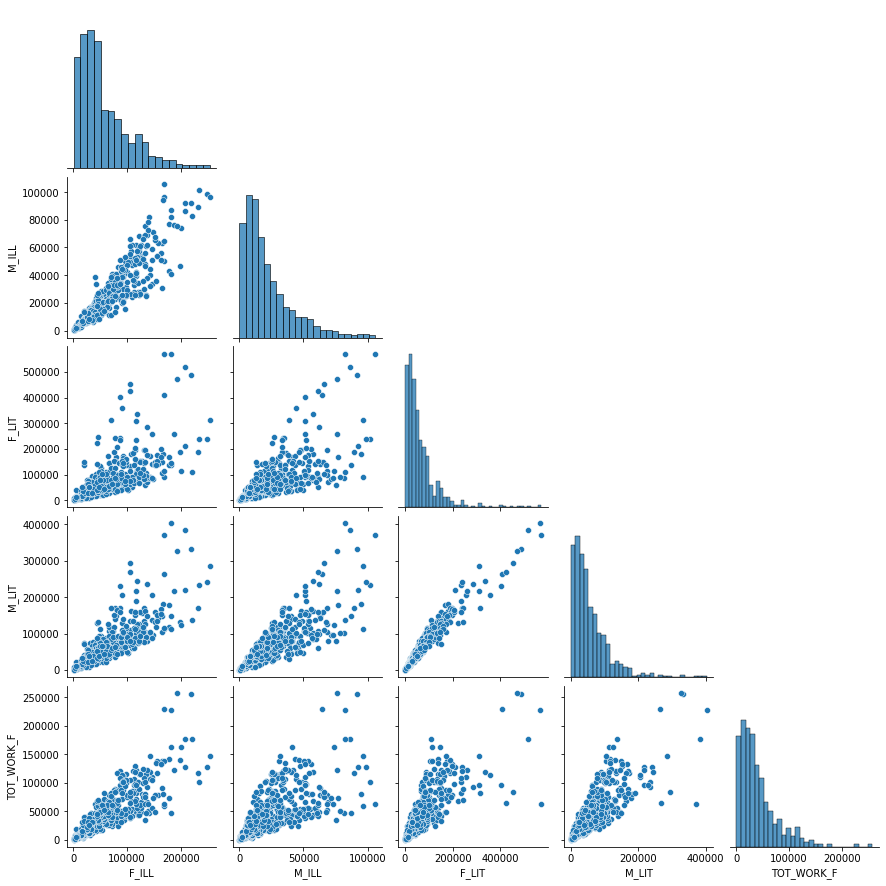

In [18]:
sns.pairplot(data_eda, corner=True)

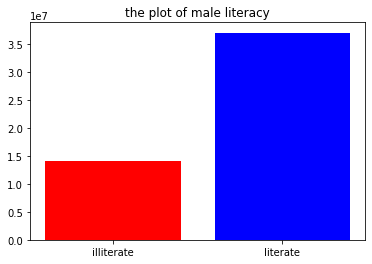

In [19]:
# Q1 most of the male population is literate or illiterate ?

height = [data.M_ILL.sum(),data.M_LIT.sum()]
bars = ('illiterate','literate')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height,color=['red','blue'])

# Create names on the x-axis
plt.xticks(y_pos, bars)

# displaying the title
plt.title("the plot of male literacy")

# Show graphic
plt.show()

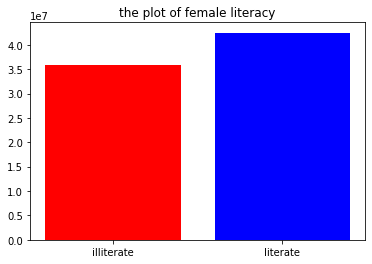

In [20]:
# Q2 most of the female population is literate or illiterate ?

height = [data.F_ILL.sum(),data.F_LIT.sum()]
bars = ('illiterate','literate')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height,color=['red','blue'])

# Create names on the x-axis
plt.xticks(y_pos, bars)

# displaying the title
plt.title("the plot of female literacy")

# Show graphic
plt.show()

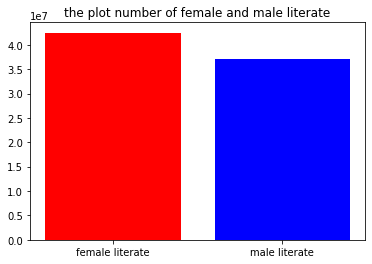

In [21]:
# Q3 which gender has more number of literate population ?

height = [data.F_LIT.sum(),data.M_LIT.sum()]
bars = ('female literate','male literate')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height,color=['red','blue'])

# Create names on the x-axis
plt.xticks(y_pos, bars)

# displaying the title
plt.title("the plot number of female and male literate")

# Show graphic
plt.show()

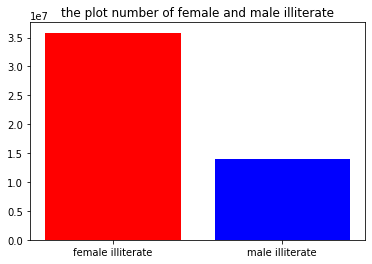

In [22]:
# Q4 which gender has more number of illiterate population ?

height = [data.F_ILL.sum(),data.M_ILL.sum()]
bars = ('female illiterate','male illiterate')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height,color=['red','blue'])

# Create names on the x-axis
plt.xticks(y_pos, bars)

# displaying the title
plt.title("the plot number of female and male illiterate")

# Show graphic
plt.show()

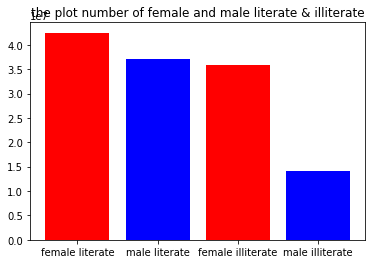

In [23]:
# Q5 which gender has most literate and illeterate polulation

height = [data.F_LIT.sum(),data.M_LIT.sum(),data.F_ILL.sum(),data.M_ILL.sum()]
bars = ('female literate','male literate','female illiterate','male illiterate')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height,color=['red','blue','red','blue'])

# Create names on the x-axis
plt.xticks(y_pos, bars)

# displaying the title
plt.title("the plot number of female and male literate & illiterate")

# Show graphic
plt.show()

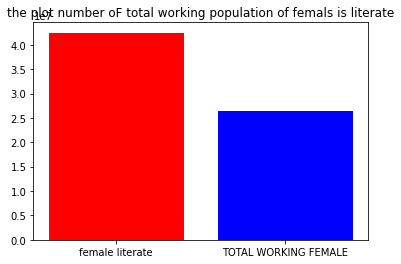

In [24]:
# Q6 how much total working population of femals is literate

height = [data.F_LIT.sum(),data.TOT_WORK_F.sum()]
bars = ('female literate','TOTAL WORKING FEMALE')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height,color=['red','blue'])

# Create names on the x-axis
plt.xticks(y_pos, bars)

# displaying the title
plt.title("the plot number oF total working population of femals is literate")

# Show graphic
plt.show()

*Part 2.3 - PCA: We choose not to treat outliers for this case. Do you think that treating outliers for this case is necessary?*

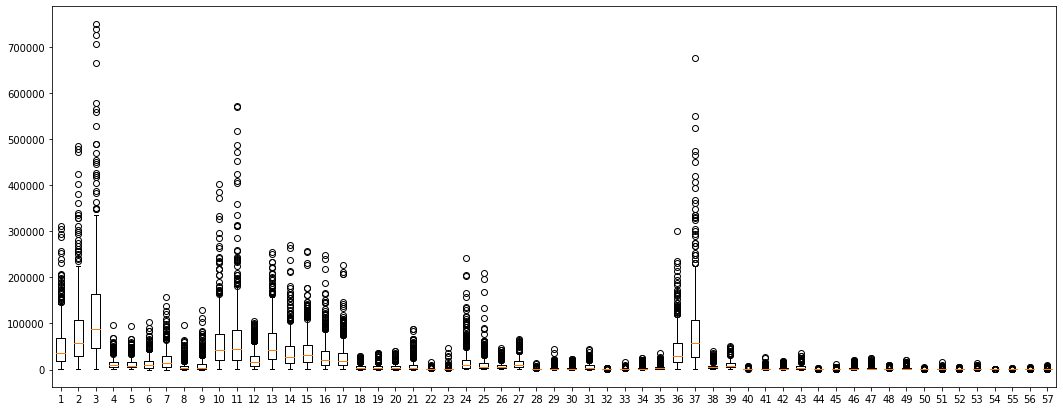

In [7]:
data2 = data.drop(['State','Area Name','State Code','Dist.Code'], axis=1)
# boxplot
plt.figure(figsize = (18,7))
plt.boxplot(data2)
plt.show()

*Part 2.4 - PCA: Scale the Data using z-score method. Does scaling have any impact on outliers? Compare boxplots before and after scaling and comment.*

In [8]:
#Scale the data
from scipy.stats import zscore
data3=data2.apply(zscore)
data3.head()

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,-0.904738,-0.771236,-0.815563,-0.561012,-0.507738,-0.958575,-0.957049,-0.423306,-0.476423,-0.798097,...,-0.163229,-0.720610,-0.156494,-0.287524,0.156577,-0.657412,-0.365258,-0.499977,-0.413053,-0.539614
1,-0.935695,-0.823100,-0.874534,-0.681096,-0.725367,-0.958297,-0.956772,-0.582014,-0.607607,-0.849434,...,-0.583103,-0.732811,-0.282327,-0.294688,-0.491731,-0.723062,0.042855,-0.073481,-0.606455,-0.598988
2,-0.972412,-1.000919,-0.981466,-0.976956,-0.965262,-0.958575,-0.956772,-0.038951,-0.027273,-0.956457,...,-0.859212,-0.921931,-0.456727,-0.420050,-0.731894,-0.795026,-0.662068,-0.635680,-0.726103,-0.707839
3,-1.037530,-1.052224,-1.041001,-1.022118,-0.995393,-0.958783,-0.957049,-0.355965,-0.390060,-1.004643,...,-0.805468,-0.900758,-0.419198,-0.385127,-0.718770,-0.784926,-0.624966,-0.616294,-0.645791,-0.710038
4,-0.822676,-0.809381,-0.813933,-0.622359,-0.649908,-0.957395,-0.955529,0.149238,0.043330,-0.800568,...,-0.348645,-0.297513,0.472670,0.434200,-0.466796,-0.625849,-0.439461,-0.309346,-0.540895,-0.249344


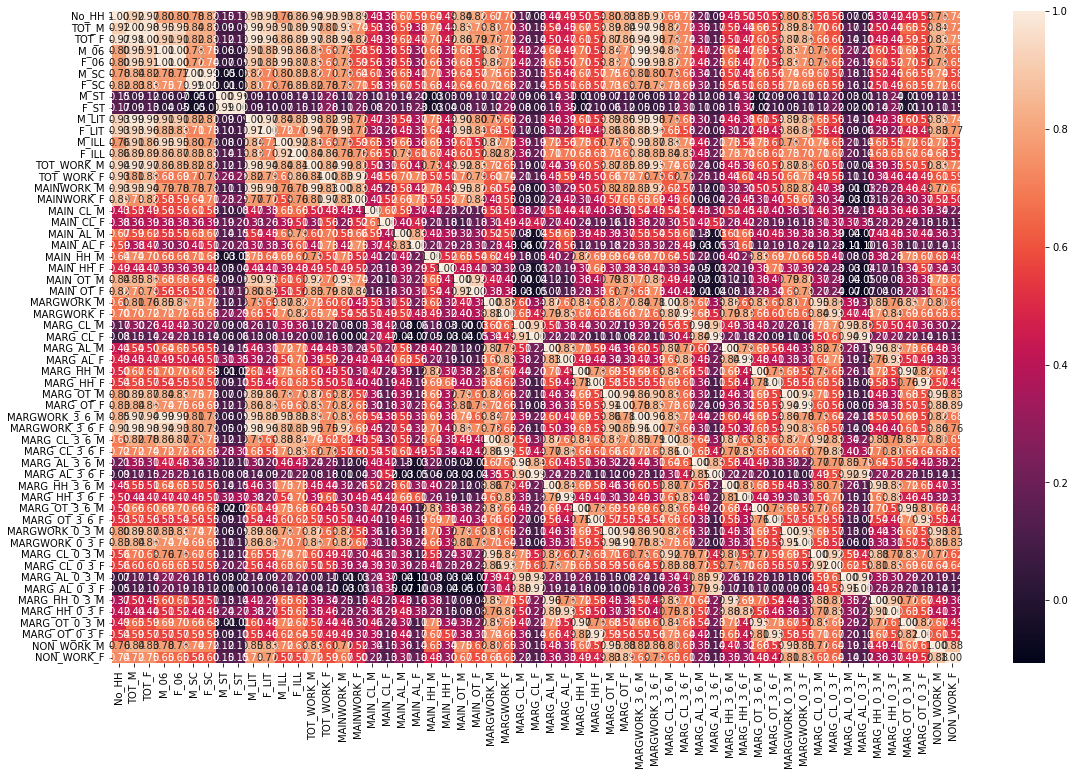

In [27]:
plt.figure(figsize = (19,12))
sns.heatmap(data3.corr(), annot=True,fmt='.2f');

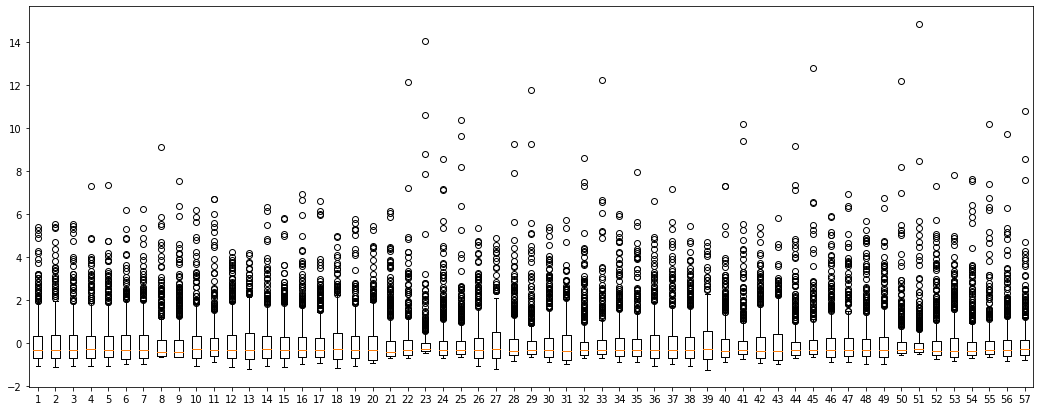

In [28]:
# boxplol
plt.figure(figsize = (18,7))
plt.boxplot(data3)
plt.show()

*Part 2.5 - PCA: Perform all the required steps for PCA (use sklearn only) Create the covariance Matrix Get eigen values and eigen vector.*

In [29]:
#Confirm the statistical significance of correlations
#H0: Correlations are not significant, H1: There are significant correlations
#Reject H0 if p-value < 0.05
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(data3)
p_value

0.0

In [30]:
#Confirm the adequacy of sample size. 
#Note: Above 0.7 is good, below 0.5 is not acceptable
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(data3)
kmo_model

0.8039889932781197

In [9]:
#Apply PCA taking all features
from sklearn.decomposition import PCA
pca = PCA(n_components=10, random_state=123)
df_pca = pca.fit_transform(data3)
df_pca.transpose() # Component output

array([[-4.61726348, -4.77166187, -5.96483558, ..., -6.294625  ,
        -6.22319199, -5.89623627],
       [ 0.13811586, -0.10586535, -0.29434689, ..., -0.63812664,
        -0.67231967, -0.93716953],
       [ 0.32854496,  0.24444898,  0.36739344, ...,  0.10748282,
         0.27132547,  0.34921836],
       ...,
       [ 0.47910326, -0.00679706,  0.04072224, ..., -0.04141574,
         0.05805966,  0.10401572],
       [ 0.04964995,  0.42438909,  0.16209537, ...,  0.19041009,
         0.09228942,  0.15985711],
       [-0.03559279, -0.1907573 ,  0.01312496, ...,  0.0337282 ,
         0.01708556, -0.06120216]])

In [10]:
np.cov(df_pca)

array([[2.65384958, 2.71559682, 3.0810424 , ..., 3.32705346, 3.26012156,
        3.09943089],
       [2.71559682, 2.95818195, 3.21927718, ..., 3.52898196, 3.42192001,
        3.25382599],
       [3.0810424 , 3.21927718, 3.85909673, ..., 4.05405594, 3.96445766,
        3.77161732],
       ...,
       [3.32705346, 3.52898196, 4.05405594, ..., 4.36443144, 4.25265838,
        4.05275828],
       [3.26012156, 3.42192001, 3.96445766, ..., 4.25265838, 4.15880459,
        3.96567682],
       [3.09943089, 3.25382599, 3.77161732, ..., 4.05275828, 3.96567682,
        3.79502824]])

In [13]:
#Extract eigen vectors
pca.components_

array([[ 1.56020579e-01,  1.67117635e-01,  1.65553179e-01,
         1.62192948e-01,  1.62566396e-01,  1.51357849e-01,
         1.51566500e-01,  2.72341946e-02,  2.81833150e-02,
         1.61992837e-01,  1.46872680e-01,  1.61749445e-01,
         1.65248187e-01,  1.59871988e-01,  1.45935804e-01,
         1.46200730e-01,  1.23970284e-01,  1.03127159e-01,
         7.45397856e-02,  1.13355712e-01,  7.38821590e-02,
         1.31572584e-01,  8.33826397e-02,  1.23526242e-01,
         1.11021264e-01,  1.64615479e-01,  1.55395618e-01,
         8.23885414e-02,  4.91953957e-02,  1.28598563e-01,
         1.14305073e-01,  1.40853227e-01,  1.27669598e-01,
         1.55262872e-01,  1.47286584e-01,  1.64971950e-01,
         1.61253433e-01,  1.65501611e-01,  1.55647049e-01,
         9.30142064e-02,  5.15358640e-02,  1.28576116e-01,
         1.10645843e-01,  1.39592763e-01,  1.24545909e-01,
         1.54293786e-01,  1.46285654e-01,  1.50125706e-01,
         1.40157047e-01,  5.25417829e-02,  4.17859530e-0

In [14]:
#Check the eigen values
#Note: This is always returned in descending order
pca.explained_variance_

array([31.81356474,  7.86942415,  4.15340812,  3.66879058,  2.20652588,
        1.93827502,  1.17617374,  0.75115909,  0.61705374,  0.52830088])

In [15]:
#Check the explained variance for each PC
#Note: Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs)
pca.explained_variance_ratio_

array([0.55726063, 0.13784435, 0.07275295, 0.06426418, 0.03865049,
       0.03395169, 0.02060239, 0.01315764, 0.01080859, 0.00925395])

In [16]:
# Create a dataframe containing the loadings or coefficients of all PCs
# we can also make 59 pcs but i have make 10 pcs
df_extracted_loadings = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7','PC8', 'PC9', 'PC10'],
                                    index = data3.columns)

*Part 2.6 - PCA: Identify the optimum number of PCs (for this project, take at least 90% explained variance). Show Scree plot.*

In [17]:
df_extracted_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
No_HH,0.156021,-0.126347,-0.002690,-0.125293,-0.007022,0.004083,-0.118110,0.057239,0.004264,0.019986
TOT_M,0.167118,-0.089677,0.056698,-0.019942,-0.033026,-0.073389,0.089554,0.111431,0.018872,-0.024502
TOT_F,0.165553,-0.104912,0.038749,-0.070873,-0.012847,-0.043647,-0.002124,0.088355,0.014911,-0.038040
M_06,0.162193,-0.022095,0.057788,0.011917,-0.050248,-0.157957,0.165067,0.169595,-0.056773,-0.153573
F_06,0.162566,-0.020271,0.050126,0.014844,-0.043848,-0.154436,0.169082,0.169458,-0.059323,-0.169566
M_SC,0.151358,-0.045111,0.002569,0.012485,-0.173007,-0.064295,-0.001566,-0.129301,0.037480,0.448517
F_SC,0.151567,-0.051924,-0.025101,-0.029893,-0.159803,-0.040518,-0.084658,-0.144352,0.041232,0.446969
M_ST,0.027234,0.027679,-0.123504,-0.222247,0.433163,0.222591,0.405505,0.021982,0.018632,0.160418
F_ST,0.028183,0.030223,-0.139769,-0.229754,0.438792,0.225531,0.357800,0.014874,0.043866,0.134862
M_LIT,0.161993,-0.115355,0.082168,-0.035163,-0.009101,-0.055465,0.045934,0.099423,0.045194,-0.005752


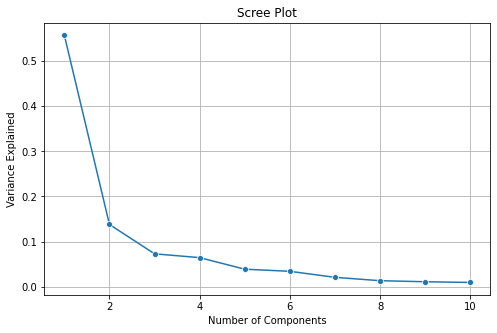

In [18]:
#Create a scree plot
plt.figure(figsize=(8,5))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,11),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

In [19]:
#Check the cumlative explained variance ratio to find a cut off for selecting the number of PCs
np.cumsum(pca.explained_variance_ratio_)

array([0.55726063, 0.69510499, 0.76785794, 0.83212212, 0.87077261,
       0.9047243 , 0.92532669, 0.93848433, 0.94929292, 0.95854687])

In [20]:
# Choose the PCs basis cumulative explained variance 
# as it was given in the question to take at least 90% explained variance se i have taken 6 PCs
df_selected = df_extracted_loadings[['PC1','PC2', 'PC3', 'PC4', 'PC5','PC6']]

In [21]:
#Check the selected PCs
df_selected

,PC1,PC2,PC3,PC4,PC5,PC6
No_HH,0.156021,-0.126347,-0.002690,-0.125293,-0.007022,0.004083
TOT_M,0.167118,-0.089677,0.056698,-0.019942,-0.033026,-0.073389
TOT_F,0.165553,-0.104912,0.038749,-0.070873,-0.012847,-0.043647
M_06,0.162193,-0.022095,0.057788,0.011917,-0.050248,-0.157957
F_06,0.162566,-0.020271,0.050126,0.014844,-0.043848,-0.154436
M_SC,0.151358,-0.045111,0.002569,0.012485,-0.173007,-0.064295
F_SC,0.151567,-0.051924,-0.025101,-0.029893,-0.159803,-0.040518
M_ST,0.027234,0.027679,-0.123504,-0.222247,0.433163,0.222591
F_ST,0.028183,0.030223,-0.139769,-0.229754,0.438792,0.225531
M_LIT,0.161993,-0.115355,0.082168,-0.035163,-0.009101,-0.055465


Part 2.7 - PCA: Compare PCs with Actual Columns and identify which is explaining most variance. Write inferences about all the Principal components in terms of actual variables.

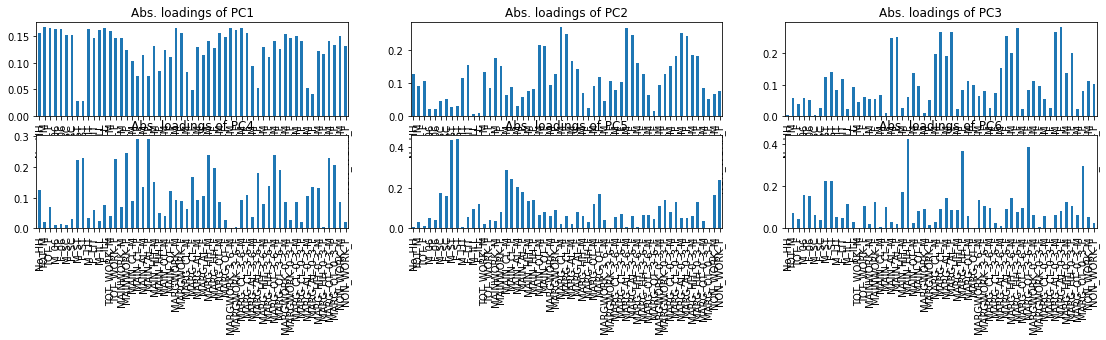

In [22]:
#Check as to how the original features matter to each PC
#Note: Here we are only considering the absolute values
plt.figure(figsize = (19,10))
for i in range(len(df_selected.columns)):
    plt.subplot(5,3,i+1)
    abs(df_selected[df_selected.columns[i]]).T.plot.bar()
    plt.title('Abs. loadings of {}'.format(df_selected.columns[i]))
    

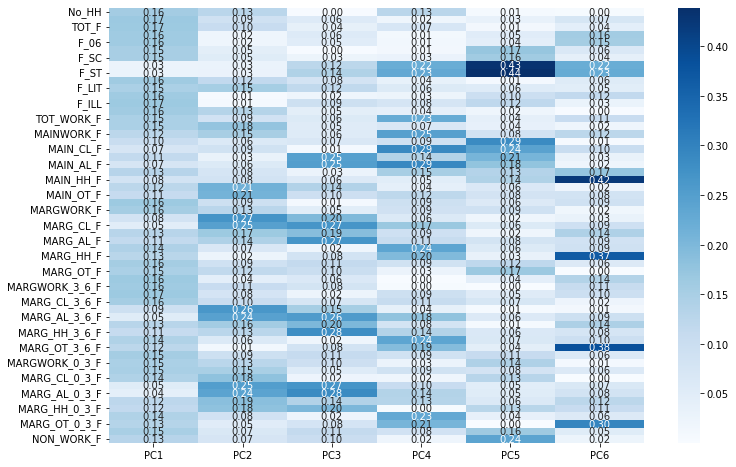

In [23]:
#Compare how the original features influence various PCs
plt.figure(figsize = (12,8))
sns.heatmap(abs(df_selected), annot = True, cmap = 'Blues',fmt = '.2f');

In [24]:
#Extract the required(as per the cumulative explained variance) number of PCs
pca = PCA(n_components=6, random_state=123)
pca_final = pca.fit_transform(data3)

In [25]:
#Just create a dataframe out of fit_transformed scaled data above
#Note: Notice the output of cell 59 and the first row of the dataframe below
pca_final_df = pd.DataFrame(pca_final, columns = df_selected.columns)
pca_final_df.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6
0,-4.617263,0.138116,0.328545,1.543697,0.353736,-0.420948
1,-4.771662,-0.105865,0.244449,1.963215,-0.153884,0.417308
2,-5.964836,-0.294347,0.367394,0.619543,0.478199,0.276581
3,-6.280796,-0.500384,0.212701,1.074515,0.300799,0.051157
4,-4.478566,0.894154,1.078277,0.535557,0.804065,0.341678
5,-3.319963,2.823865,3.058460,-0.447904,0.742445,0.634676
6,-5.021393,-0.346359,0.650378,0.981072,-0.059778,-0.246957
7,-4.608709,0.022370,0.398755,1.576995,0.171316,-0.139444
8,-5.186703,-0.059097,0.184397,1.735440,0.169174,0.455039
9,-4.226190,-1.335080,0.697838,1.470509,0.269146,-0.002576


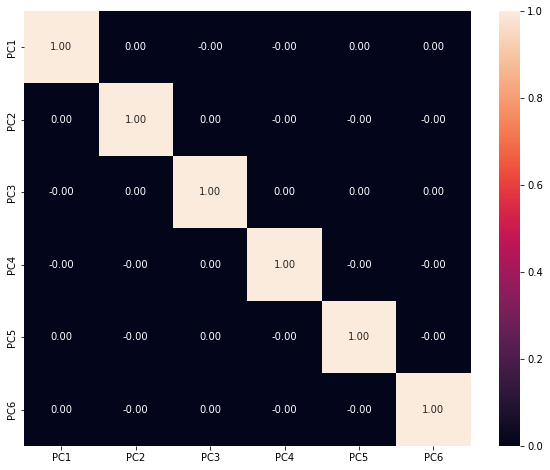

In [26]:
#Check for presence of correlations among teh PCs
plt.figure(figsize = (10,8))
sns.heatmap(pca_final_df.corr(), annot=True,fmt='.2f');

*Part 2.8 - PCA: Write linear equation for first PC.*

linear equation formula : PC1 = a1x1+a2x2+a3x3+a4x4+....a57x57

a1,a2,a2..= Coefficients of PC1

x1,x2,x3..= Variables of PC1

In [27]:
# coefficients of pc1
pca.components_[0]

array([0.15602058, 0.16711763, 0.16555318, 0.16219295, 0.1625664 ,
       0.15135785, 0.1515665 , 0.02723419, 0.02818332, 0.16199284,
       0.14687268, 0.16174944, 0.16524819, 0.15987199, 0.1459358 ,
       0.14620073, 0.12397028, 0.10312716, 0.07453979, 0.11335571,
       0.07388216, 0.13157258, 0.08338264, 0.12352624, 0.11102126,
       0.16461548, 0.15539562, 0.08238854, 0.0491954 , 0.12859856,
       0.11430507, 0.14085323, 0.1276696 , 0.15526287, 0.14728658,
       0.16497195, 0.16125343, 0.16550161, 0.15564705, 0.09301421,
       0.05153586, 0.12857612, 0.11064584, 0.13959276, 0.12454591,
       0.15429379, 0.14628565, 0.15012571, 0.14015705, 0.05254178,
       0.04178595, 0.12184035, 0.11601141, 0.13986877, 0.13219224,
       0.15037558, 0.1310662 ])

In [34]:
# Variables of pc1
data3.iloc[0,:]

No_HH            -0.904738
TOT_M            -0.771236
TOT_F            -0.815563
M_06             -0.561012
F_06             -0.507738
M_SC             -0.958575
F_SC             -0.957049
M_ST             -0.423306
F_ST             -0.476423
M_LIT            -0.798097
F_LIT            -0.733477
M_ILL            -0.604015
F_ILL            -0.798229
TOT_WORK_M       -0.859260
TOT_WORK_F       -1.010238
MAINWORK_M       -0.872367
MAINWORK_F       -0.898216
MAIN_CL_M        -1.042844
MAIN_CL_F        -0.986630
MAIN_AL_M        -0.851060
MAIN_AL_F        -0.683276
MAIN_HH_M        -0.630766
MAIN_HH_F        -0.407555
MAIN_OT_M        -0.624042
MAIN_OT_F        -0.611637
MARGWORK_M       -0.516943
MARGWORK_F       -0.966512
MARG_CL_M        -0.321809
MARG_CL_F        -0.485053
MARG_AL_M        -0.331426
MARG_AL_F        -0.860192
MARG_HH_M        -0.377984
MARG_HH_F        -0.453026
MARG_OT_M        -0.548764
MARG_OT_F        -0.614625
MARGWORK_3_6_M   -0.648040
MARGWORK_3_6_F   -0.663795
M

In [32]:
linear_eq_pc1 =  (data3.iloc[0,:])*(pca.components_[0])
linear_eq_pc1

No_HH            -0.141158
TOT_M            -0.128887
TOT_F            -0.135019
M_06             -0.090992
F_06             -0.082541
M_SC             -0.145088
F_SC             -0.145057
M_ST             -0.011528
F_ST             -0.013427
M_LIT            -0.129286
F_LIT            -0.107728
M_ILL            -0.097699
F_ILL            -0.131906
TOT_WORK_M       -0.137372
TOT_WORK_F       -0.147430
MAINWORK_M       -0.127541
MAINWORK_F       -0.111352
MAIN_CL_M        -0.107545
MAIN_CL_F        -0.073543
MAIN_AL_M        -0.096473
MAIN_AL_F        -0.050482
MAIN_HH_M        -0.082992
MAIN_HH_F        -0.033983
MAIN_OT_M        -0.077086
MAIN_OT_F        -0.067905
MARGWORK_M       -0.085097
MARGWORK_F       -0.150192
MARG_CL_M        -0.026513
MARG_CL_F        -0.023862
MARG_AL_M        -0.042621
MARG_AL_F        -0.098324
MARG_HH_M        -0.053240
MARG_HH_F        -0.057838
MARG_OT_M        -0.085203
MARG_OT_F        -0.090526
MARGWORK_3_6_M   -0.106908
MARGWORK_3_6_F   -0.107039
M

In [33]:
#Linear equation of pc1
linear_eq_pc1.sum()

-4.617263481554375

Now if we compare our PC1 score with original value i.e in our pca_final_df data frame both values are same (-4.617263481554375) 